,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,Month
0,4918,CA-2019-160304,2019-01-01,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,0,Online,2019-01
1,4919,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,0,Online,2019-01
2,4920,CA-2019-160304,2019-01-02,2019-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2,67.2742,0,Cards,2019-01
3,3074,CA-2019-125206,2019-01-03,2019-01-05,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,0,Online,2019-01
4,8604,US-2019-116365,2019-01-03,2019-01-08,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,0,Online,2019-01


Top 5 Products by Sales:
                                       Product Name  Total_Sales
0  3D Systems Cube Printer, 2nd Generation, Magenta    14334.890
1             Canon imageCLASS 2200 Advanced Copier    14076.824
2              Hewlett Packard LaserJet 3310 Copier    13837.732
3        GBC DocuBind TL300 Electric Binding System    12890.258
4         GBC DocuBind P400 Electric Binding System    12577.108

Sales by Region:
    Region  Total_Sales
0  Central  341007.5242
1     East  450234.6660
2    South  252121.0810
3     West  522441.0520

Sales by Customer Segment:
       Segment  Total_Sales
0     Consumer  753002.1291
1    Corporate  509743.1262
2  Home Office  303059.0679

Low Profit Categories:
          Category  Total_Profit
0        Furniture    10006.6112
1  Office Supplies    74797.2461
2       Technology    90458.2486


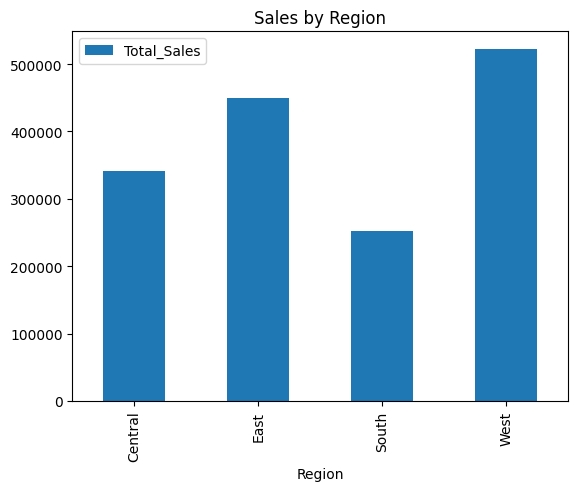

In [ ]:
# Step 0: Import Libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Step 1: Load cleaned dataset
df = pd.read_csv('/content/superstore_sales_cleaned.csv')
display(df.head())

# Step 2: Create SQLite in-memory database
conn = sqlite3.connect(':memory:')
df.to_sql('superstore', conn, index=False, if_exists='replace')

# Step 3: Example Queries

# Top 5 Products by Sales
top_products = pd.read_sql("""
SELECT [Product Name], SUM(Sales) as Total_Sales
FROM superstore
GROUP BY [Product Name]
ORDER BY Total_Sales DESC
LIMIT 5
""", conn)
print("Top 5 Products by Sales:")
print(top_products)

# Sales by Region
sales_region = pd.read_sql("""
SELECT Region, SUM(Sales) as Total_Sales
FROM superstore
GROUP BY Region
""", conn)
print("\nSales by Region:")
print(sales_region)

# Sales by Customer Segment
sales_segment = pd.read_sql("""
SELECT Segment, SUM(Sales) as Total_Sales
FROM superstore
GROUP BY Segment
""", conn)
print("\nSales by Customer Segment:")
print(sales_segment)

# Low Profit Categories
low_profit = pd.read_sql("""
SELECT Category, SUM(Profit) as Total_Profit
FROM superstore
GROUP BY Category
ORDER BY Total_Profit ASC
""", conn)
print("\nLow Profit Categories:")
print(low_profit)

# Step 4: Simple Chart Example
sales_region.plot(kind='bar', x='Region', y='Total_Sales', title='Sales by Region')
plt.show()